### MLBookcamp Homework 2
https://github.com/alexeygrigorev/mlbookcamp-code/blob/master/course-zoomcamp/cohorts/2022/02-regression/homework.md

In [8]:
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv

--2022-09-19 11:54:42--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1423529 (1.4M) [text/plain]
Saving to: ‘housing.csv’

housing.csv         100%[===================>]   1.36M  --.-KB/s    in 0.1s    

2022-09-19 11:54:43 (10.8 MB/s) - ‘housing.csv’ saved [1423529/1423529]



In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import numpy as np

df = pd.read_csv("./housing.csv")

df = df[['latitude',
'longitude',
'housing_median_age',
'total_rooms',
'total_bedrooms',
'population',
'households',
'median_income',
'median_house_value']]
df.columns = df.columns.str.lower().str.replace(' ', '_')

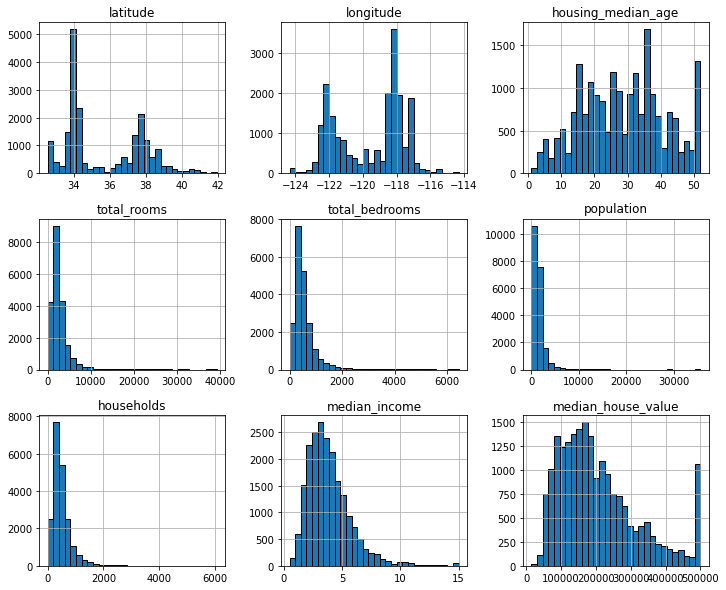

In [16]:
_ = df.hist(figsize=(12, 10), bins=30, edgecolor="black")
#plt.subplots_adjust(hspace=0.7, wspace=0.4)

In [29]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [30]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


In [13]:
df.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   latitude            20640 non-null  float64
 1   longitude           20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


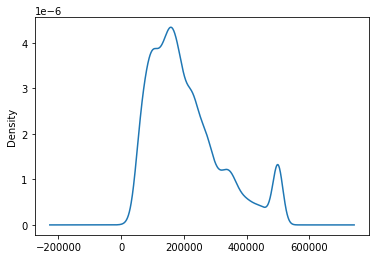

In [18]:
_ = df.median_house_value.plot.density()

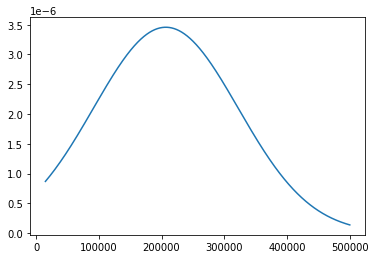

In [19]:
plt.plot(sorted(df.median_house_value), stats.norm.pdf(sorted(df.median_house_value), df.median_house_value.mean(), df.median_house_value.std()))
plt.show()

<AxesSubplot:xlabel='median_house_value', ylabel='Density'>

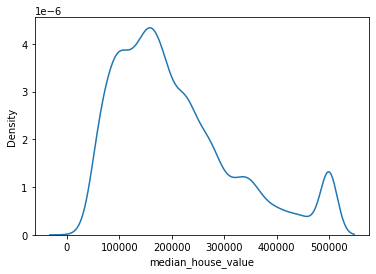

In [35]:
sns.kdeplot(df.median_house_value)

In [20]:
df.isna().sum()

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

### A1: Missing Values in column Total Bedrooms = 207

In [21]:
df.population.median()

1166.0

### A2: Population Median = 1155

In [19]:
np.random.seed(42)
# df.sample(frac=1).reset_index(drop=True)
df.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,37.88,-122.23,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,37.86,-122.22,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,37.85,-122.24,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,37.85,-122.25,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,37.85,-122.25,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


In [22]:
n = len(df)

n_val = n // 5
n_test = n // 5
n_train = n - n_val - n_test

idx = np.arange(n)
np.random.shuffle(idx)

dfshuffled = df.iloc[idx]

dftrain = dfshuffled.iloc[:n_train].copy()
dfval = dfshuffled.iloc[n_train:n_train+n_val].copy()
dftest = dfshuffled.iloc[n_train+n_val:].copy()

yval = np.log1p(dfval.median_house_value.values)
ytest = np.log1p(dftest.median_house_value.values)
ytrain = np.log1p(dftrain.median_house_value.values)

In [23]:
del dfval['median_house_value']
del dftest['median_house_value']
del dftrain['median_house_value']

In [7]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

def prepare_X_0(df):
    df = df.fillna(0)
    X = df.values
    return X

def prepare_X_m(df):
    df['total_bedrooms'].fillna(int(df['total_bedrooms'].mean()), inplace=True)
    X = df.values
    return X

In [8]:
def prepare_X_0(df):
    df = df.fillna(0)
    X = df.values
    return X

def prepare_X_m(df):
    df['total_bedrooms'].fillna(int(df['total_bedrooms'].mean()), inplace=True)
    X = df.values
    return X

In [24]:
Xtrain = prepare_X_0(dftrain)
w_0, w = train_linear_regression(Xtrain, ytrain)

In [25]:
Xval = prepare_X_0(dfval)
yvpred0 = w_0 + Xval.dot(w)

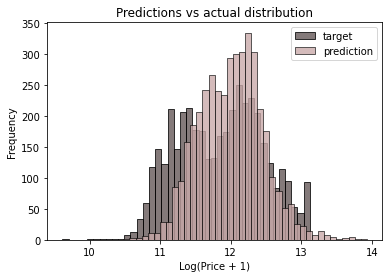

In [44]:
plt.figure(figsize=(6, 4))

sns.histplot(yval, label='target', color='#322222', alpha=0.6, bins=40)
sns.histplot(yvpred0, label='prediction', color='#caaaaa', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Predictions vs actual distribution')

plt.show()

In [14]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [26]:
score0 = round(rmse(yval, yvpred0),2)
score0

0.34

### RMSE with 0 fill = 0.34

In [27]:
Xval = prepare_X_m(dfval)
yvpredm = w_0 + Xval.dot(w)

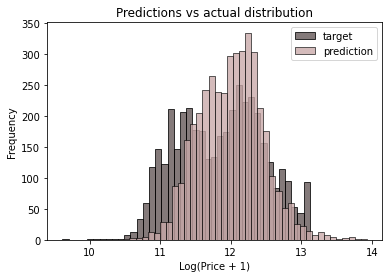

In [47]:
plt.figure(figsize=(6, 4))

sns.histplot(yval, label='target', color='#322222', alpha=0.6, bins=40)
sns.histplot(yvpredm, label='prediction', color='#caaaaa', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Predictions vs actual distribution')

plt.show()

In [28]:
score_mean = round(rmse(yval, yvpredm), 2)
score_mean

0.34

### RMSE with mean fillers = 0.34
### A3: Both Equally good

In [9]:
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [15]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

def prepare_X_0(df):
    df = df.fillna(0)
    X = df.values
    return X

def prepare_X_m(df):
    df['total_bedrooms'].fillna(int(df['total_bedrooms'].mean()), inplace=True)
    X = df.values
    return X

def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [33]:
r_range = [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]

df = pd.read_csv("./housing.csv")
df = df[['latitude',
'longitude',
'housing_median_age',
'total_rooms',
'total_bedrooms',
'population',
'households',
'median_income',
'median_house_value']]
df.columns = df.columns.str.lower().str.replace(' ', '_')

for r in r_range:
    np.random.seed(42)
    # df.sample(frac=1).reset_index(drop=True)
    n = len(df)

    n_val = n // 5
    n_test = n // 5
    n_train = n - n_val - n_test
    
    idx = np.arange(n)
    np.random.shuffle(idx)
    
    dfshuffled = df.iloc[idx]
    
    dftrain = dfshuffled.iloc[:n_train].copy()
    dfval = dfshuffled.iloc[n_train:n_train+n_val].copy()
    dftest = dfshuffled.iloc[n_train+n_val:].copy()

    yval = np.log1p(dfval.median_house_value.values)
    ytest = np.log1p(dftest.median_house_value.values)
    ytrain = np.log1p(dftrain.median_house_value.values)
    
    del dfval['median_house_value']
    del dftest['median_house_value']
    del dftrain['median_house_value']
    
    Xtrain = prepare_X_0(dftrain)
    w_0, w = train_linear_regression_reg(Xtrain, ytrain, r=r)

    Xval = prepare_X_0(dfval)
    yvpred0 = w_0 + Xval.dot(w)
    
    rmseval = round(rmse(yval, yvpred0),10)
    
    rmselist.append(rmseval)
    
    print(f"r: {r}\nrmse: {rmseval}")

r: 0
rmse: 0.3295330365
r: 1e-06
rmse: 0.3295330362
r: 0.0001
rmse: 0.329533001
r: 0.001
rmse: 0.3295327039
r: 0.01
rmse: 0.3295319366
r: 0.1
rmse: 0.3296947205
r: 1
rmse: 0.333788722
r: 5
rmse: 0.3392485346
r: 10
rmse: 0.3406063808


### A4: Best rmse with r = 0.001

In [34]:
seed_range = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

df = pd.read_csv("./housing.csv")
df = df[['latitude',
'longitude',
'housing_median_age',
'total_rooms',
'total_bedrooms',
'population',
'households',
'median_income',
'median_house_value']]
df.columns = df.columns.str.lower().str.replace(' ', '_')

rmselist = []

for seed in seed_range:
    np.random.seed(seed)
    # df.sample(frac=1).reset_index(drop=True)
    n = len(df)

    n_val = n // 5
    n_test = n // 5
    n_train = n - n_val - n_test
    
    idx = np.arange(n)
    np.random.shuffle(idx)
    
    dfshuffled = df.iloc[idx]
    
    dftrain = dfshuffled.iloc[:n_train].copy()
    dfval = dfshuffled.iloc[n_train:n_train+n_val].copy()
    dftest = dfshuffled.iloc[n_train+n_val:].copy()

    yval = np.log1p(dfval.median_house_value.values)
    ytest = np.log1p(dftest.median_house_value.values)
    ytrain = np.log1p(dftrain.median_house_value.values)
    
    del dfval['median_house_value']
    del dftest['median_house_value']
    del dftrain['median_house_value']
    
    Xtrain = prepare_X_0(dftrain)
    w_0, w = train_linear_regression(Xtrain, ytrain)

    Xval = prepare_X_0(dfval)
    yvpred0 = w_0 + Xval.dot(w)
    
    rmseval = round(rmse(yval, yvpred0),5)
    
    rmselist.append(rmseval)
    
    print(f"seed: {seed}\nrmse: {rmseval}")
    
print(f"Std of rmse: {np.std(rmselist)}")

seed: 0
rmse: 0.33884
seed: 1
rmse: 0.33624
seed: 2
rmse: 0.33209
seed: 3
rmse: 0.34052
seed: 4
rmse: 0.3389
seed: 5
rmse: 0.34349
seed: 6
rmse: 0.3452
seed: 7
rmse: 0.3396
seed: 8
rmse: 0.34662
seed: 9
rmse: 0.33659
Std of rmse: 0.0041713246097612715


### A5: Std deviation of rmse: ~0.005

In [35]:
df = pd.read_csv("./housing.csv")
df = df[['latitude',
'longitude',
'housing_median_age',
'total_rooms',
'total_bedrooms',
'population',
'households',
'median_income',
'median_house_value']]
df.columns = df.columns.str.lower().str.replace(' ', '_')

np.random.seed(9)
# df.sample(frac=1).reset_index(drop=True)
n = len(df)

n_test = n // 5
n_train = n - n_test

idx = np.arange(n)
np.random.shuffle(idx)

dfshuffled = df.iloc[idx]

dftrain = dfshuffled.iloc[:n_train].copy()
dftest = dfshuffled.iloc[n_train:].copy()

ytest = np.log1p(dftest.median_house_value.values)
ytrain = np.log1p(dftrain.median_house_value.values)

del dftest['median_house_value']
del dftrain['median_house_value']

Xtrain = prepare_X_0(dftrain)
w_0, w = train_linear_regression_reg(Xtrain, ytrain, r=0.001)

Xval = prepare_X_0(dfval)
yvpred0 = w_0 + Xval.dot(w)

rmseval = round(rmse(yval, yvpred0),5)

rmselist.append(rmseval)

print(f"rmse: {rmseval}")

rmse: 0.33584


### A6: RMSE: ~0.35